In [30]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [31]:
print('Current Directory: '+os.getcwd())

CSV_path = 'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04'
CSV_corrected_path = CSV_path + '\corrected'
print(CSV_corrected_path)

Current Directory: C:\Users\abhim\Documents\Jupyter Notebooks\FGDOS Radiation Testing\HollandPTC-12_04
E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\corrected


In [32]:
file_s1 ='FGDOS_03F_HIGH_B3_4_PASSIVE_FAIL-1_Apr_12_22-23-53_s1.csv'
file_s2 ='FGDOS_03F_HIGH_B3_4_PASSIVE_FAIL-1_Apr_12_22-23-53_s2.csv'
print(file_s1)
print(file_s2)
df_s1 = pd.read_csv('E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\Arduino_CSV\corrected'+ '\\'+ file_s1 ,encoding='ISO-8859-1')
df_s2 = pd.read_csv('E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\Arduino_CSV\corrected'+ '\\'+ file_s2 ,encoding='ISO-8859-1')


FGDOS_03F_HIGH_B3_4_PASSIVE_FAIL-1_Apr_12_22-23-53_s1.csv
FGDOS_03F_HIGH_B3_4_PASSIVE_FAIL-1_Apr_12_22-23-53_s2.csv


In [34]:
s1 = df_s1.to_numpy()
s2 = df_s2.to_numpy()
df_s1.head()
df_s2.head()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
0,3.9759,2,86,74325,71601,0,7.63,h,0,0
1,232.5317,2,86,74295,71601,0,7.63,h,0,0
2,498.4661,2,86,74340,71586,0,7.63,h,0,0
3,1022.8905,2,86,74356,71609,0,7.63,h,0,0
4,1285.8140,2,86,74394,71609,0,7.63,h,0,0


In [36]:
df_s1.tail()
df_s2.tail()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
213,59318.2880,2,87,83999,71548,1,7.63,h,0,0
214,59580.4782,2,87,83992,71563,1,7.63,h,0,0
215,59846.3820,2,87,84014,71556,1,7.63,h,0,0
216,60108.3856,2,87,83885,71548,1,7.63,h,0,0
217,60129.1042,2,0,0,0,0,7.63,h,1,0


In [24]:
# TID Baseline test, possible SEE detected in this reason
energy = 120
dose_rate_air = 0.6  # Gy/min
conv_factor = 0.906   # LET protons in Si / Air @ energy
dose_rate_Si = dose_rate_air * conv_factor

In [37]:
s1[s1[:,3]<90000]

array([[0.0, 1, 89, ..., 'h', 0, 0],
       [249.3322, 1, 89, ..., 'h', 0, 0],
       [511.2515, 1, 89, ..., 'h', 0, 0],
       ...,
       [132735.5814, 1, 93, ..., 'h', 0, 0],
       [132997.8129, 1, 91, ..., 'h', 0, 0],
       [133259.778, 1, 92, ..., 'h', 0, 0]], dtype=object)

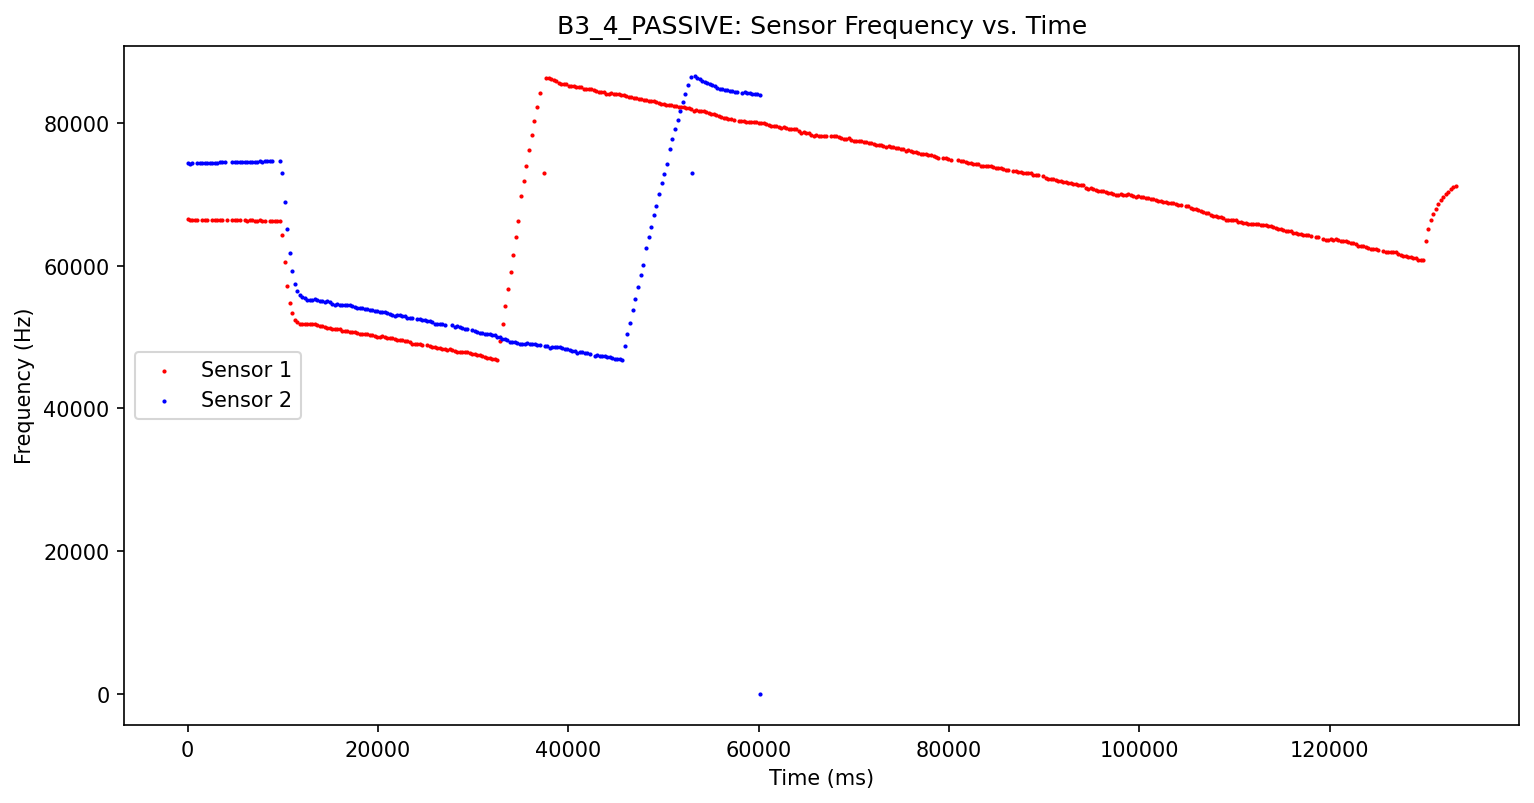

In [62]:
fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(0.05e5,0.5e5)
#plt.xlim(ll_2,ul_2)
#plt.ylim(0.3e5,1.2e5)
plt.legend(loc="center left")
plt.title("B3_4_PASSIVE: Sensor Frequency vs. Time")
plt.show()

In [54]:
# Sensor 1 irradiation intervals
#s1[(s1[:,0]> 6.2e4) & (s1[:,0]< 9e4)]
ll_1 = 0.15e5
ul_1 = 0.32e5
zone_1 = s1[(s1[:,0]> ll_1) & (s1[:,0]< ul_1)]

ll_2 = 1.9e5
ul_2 = 3.1e5
zone_2 = s1[(s1[:,0]> ll_2) & (s1[:,0]< ul_2)]

In [43]:
# Sensitivity Sensor 1 - Overall
model_s1 = LinearRegression()
t = s1[1:,0].reshape(-1, 1)
s_freq = s1[1:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.03669051573624971
intercept: [65063.35819791]
slope: [[0.05518743]]
Sensor 1 sensitivity in kHz/Gy:  [[6.09132742]]


In [55]:
# Sensitivity Sensor 1 - Zone 1
model_s1 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.9964180876334731
intercept: [55018.94386207]
slope: [[-0.24685911]]
Sensor 1 sensitivity in kHz/Gy:  [[27.24714279]]


In [30]:
# Sensitivity Sensor 1 - Zone 2
model_s1 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.9998225987751787
intercept: [138110.87757323]
slope: [[-0.28944422]]
Sensor 1 sensitivity in kHz/Gy:  [[31.94748545]]


In [56]:
# Sensor 2 irradiation intervals
ll_1 = 0.13e5
ul_1 = 0.4e5
zone_1 = s2[(s2[:,0]> ll_1) & (s2[:,0]< ul_1)]

ll_2 = 1.9e5
ul_2 = 3.1e5
zone_2 = s2[(s2[:,0]> ll_2) & (s2[:,0]< ul_2)]

In [46]:
# Sensitivity Sensor 2 - Overall
model_s2 = LinearRegression()
t = s2[1:,0].reshape(-1, 1)
s_freq = s2[1:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.01597056857252921
intercept: [57903.94161513]
slope: [[0.10178245]]
Sensor 2 sensitivity in kHz/Gy:  [[11.23426565]]


In [57]:
# Sensitivity Sensor 2 - Zone 1
model_s2 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.9949544625526525
intercept: [59003.83682369]
slope: [[-0.27306676]]
Sensor 2 sensitivity in kHz/Gy:  [[30.13981924]]


In [34]:
# Sensitivity Sensor 2 - Zone 2
model_s2 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)
print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.9997663559341592
intercept: [143206.13721548]
slope: [[-0.31037369]]
Sensor 2 sensitivity in kHz/Gy:  [[34.25758193]]


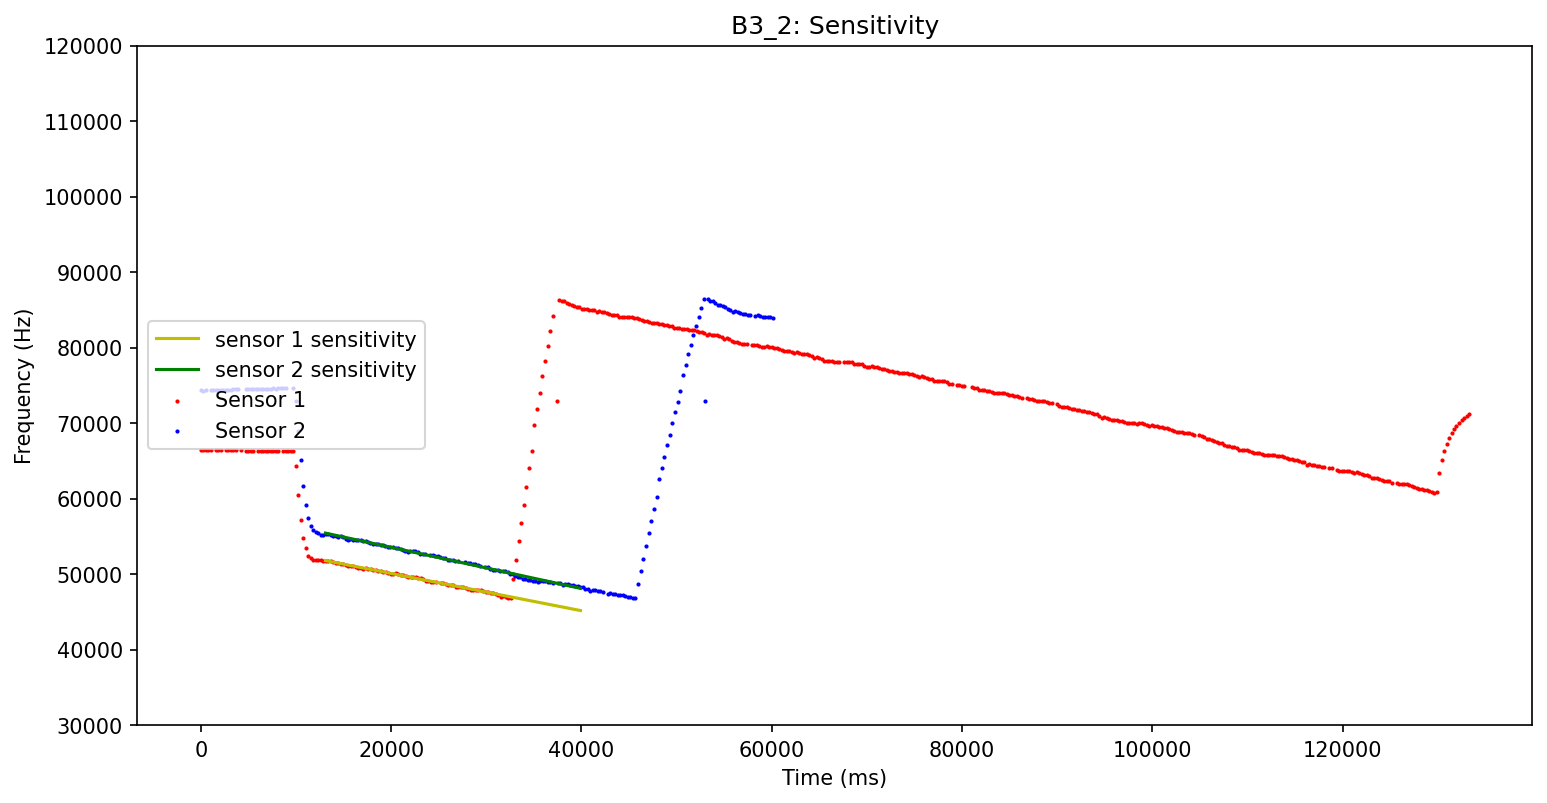

In [58]:
# Plot the linear regression lines
intercept_s1 = model_s1.intercept_
slope_s1 = model_s1.coef_
sensi_s1 = intercept_s1 + t*slope_s1

intercept_s2 = model_s2.intercept_
slope_s2 = model_s2.coef_
sensi_s2 = intercept_s2 + t*slope_s2

fig_sensitivity_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')
plt.plot(t,sensi_s1,'y-',label='sensor 1 sensitivity')
plt.plot(t,sensi_s2,'g-',label='sensor 2 sensitivity')
plt.ylim(0.3e5,1.2e5)

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc="center left")
plt.title("B3_2: Sensitivity")
plt.show()

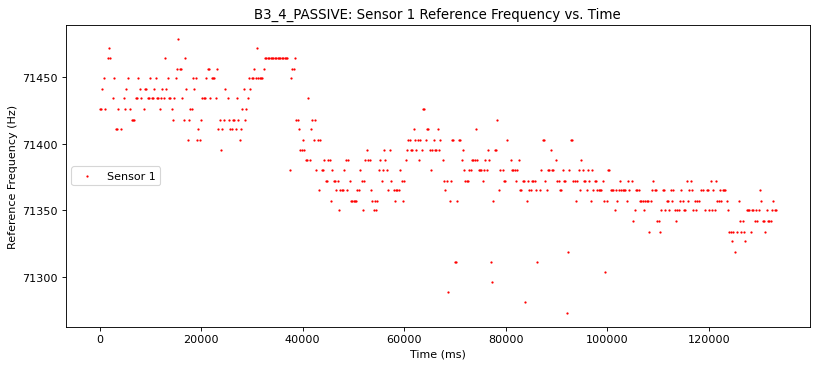

min:  71273
max:  71479
range:  206
mean:  71389.08588957055
standard deviation:  38.20246334732561


In [59]:
fig_ref_freq_s1 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s1[:,0], s1[:,4],s=1, c='r', label = 'Sensor 1')
#plt.scatter(s2[1:,0], s2[1:,4],s=1,label = 'Sensor 2')
#plt.plot(B4_PRE_TEST[1:,0], B4_PRE_TEST[1:,4],"g-",label = 'Reference frequency')

plt.xlabel('Time (ms)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("B3_4_PASSIVE: Sensor 1 Reference Frequency vs. Time")
plt.show()
print('min: ',s1[:,4].min())
print('max: ',s1[:,4].max())
print('range: ',s1[:,4].max()-s1[:,4].min())
print('mean: ',s1[:,4].mean())
print('standard deviation: ',s1[:,4].std())

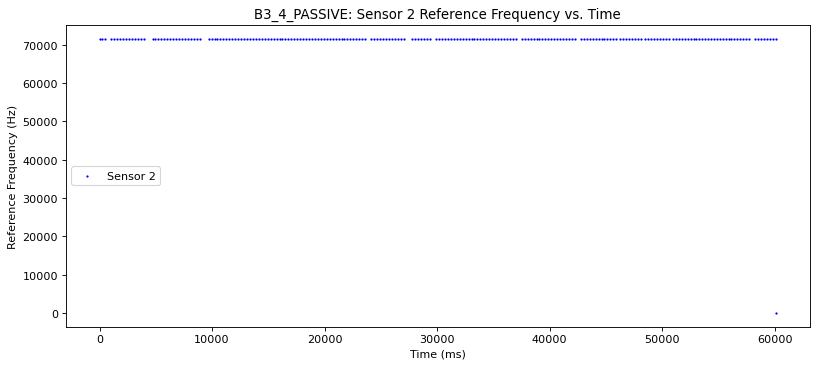

min:  0
max:  71609
range:  71609
mean:  71239.15596330275
sigma:  4836.067495363577


In [60]:
fig_ref_freq_s2 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s2[:,0], s2[:,4],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("B3_4_PASSIVE: Sensor 2 Reference Frequency vs. Time")
plt.show()

print('min: ',s2[:,4].min())
print('max: ',s2[:,4].max())
print('range: ',s2[:,4].max()-s2[:,4].min())
print('mean: ',s2[:,4].mean())
print('sigma: ',s2[:,4].std())

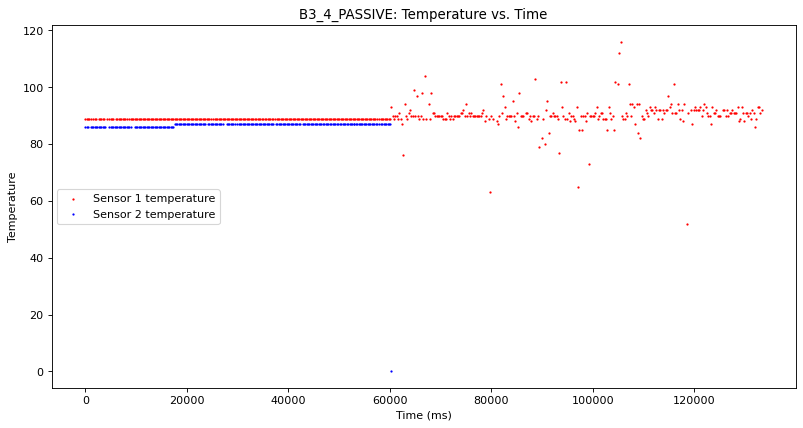

In [61]:
fig_temp = plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(s1[:,0], s1[:,2],s=1,c='r',label = 'Sensor 1 temperature')
plt.scatter(s2[:,0], s2[:,2],s=1,c='b',label = 'Sensor 2 temperature')

plt.xlabel('Time (ms)')
plt.ylabel('Temperature')
plt.legend(loc="center left")
plt.title("B3_4_PASSIVE: Temperature vs. Time")
plt.show()

In [15]:
s1[:,0].shape
        

(1600,)